# Deutsch's Algorithm

Four possible versions of the blackbox oracle function f, each described as a unitary matrix:

In [1]:
# quantum version of f(0) = 1 and f(1) = 0
def oracleBalance1(qc):
    qc.x(1)
    qc.cx(0,1)

# quantum version of f(0) = 0 and f(1) = 1
def oracleBalance2(qc):
    qc.cx(0, 1)

# quantum version of f(0) = 0 and f(1) = 0
def oracleConstant1(qcir):
    pass # do nothing; equivalent to 4x4 identity matrix

# quantum version of f(0) = 1 and f(1) = 1
def oracleConstant2(qcir):
    qcir.x(1)

Main algorithm:

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def deutschAlgorithm(oracle):
    # initialize quantum register and classical register
    q_registers = QuantumRegister(2)   # 2 qubits
    c_registers = ClassicalRegister(1) # 1 bit

    # create quantum circuit
    qc = QuantumCircuit(q_registers, c_registers)
    qc.x(1)  # Pauli X gate: flips initial state of second qubit from |0> to |1>)
    qc.h(0)  # Hadamard gate: put first qubit in superposition between |0> and |1>
    qc.h(1)  # Hadamard gate: put second qubit in superposition between |0> and |1>

    oracle(qc)  # "insert" the oracle function into the circuit

    qc.h(0)  # Hadamard gate again

    qc.measure(q_registers[0], c_registers)

    return qc

qc = deutschAlgorithm(oracleConstant1)
qc.draw()



┌───┐┌───┐┌─┐
q38_0: ┤ H ├┤ H ├┤M├
       ├───┤├───┤└╥┘
q38_1: ┤ X ├┤ H ├─╫─
       └───┘└───┘ ║ 
 c4: 1/═══════════╩═
                  0

Run the algorithm and plot results:

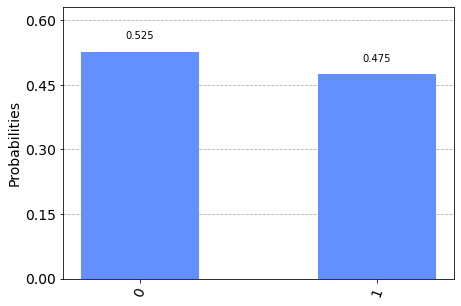

In [9]:
from qiskit import execute, BasicAer
from qiskit.visualization import plot_histogram

backend = BasicAer.get_backend("qasm_simulator")

results = execute(qc, backend = backend, shots = 1024).result()
answer = results.get_counts()

plot_histogram(answer)  # "0" bit means oracle is constant, "1" bit means oracle is balanced